In [1]:
##1 I would use a clustering algorithm to segment a company customers database into multiple groups

In [2]:
##2 I would frame the problem of spam detection as a supervised learning, because their are 
# two output options either spam or not spam.

In [3]:
##3 A test set is a portion of a data set and I would want to use one to test the future performance 
# of a prediction or classificatio model.

In [ ]:
##4 (e)

In [13]:
##5a
import boto3
import pandas as pd; pd.set_option('display.max_columns', 100)
import numpy as np

s3 = boto3.resource('s3')
bucket_name = 'omar-vargas-bucket'
bucket = s3.Bucket(bucket_name)

file_key = 'Real_Estate.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

#Reading the data-file
house_price = pd.read_csv(file_content_stream)
house_price.head()

,No,transaction_date,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [14]:
##5b
#Dropping No and transaction date columns
house_price = house_price.drop(columns = ['No', 'transaction_date'], axis = 1)
house_price.head()

,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


In [15]:
##5c
from sklearn.model_selection import train_test_split

#Defining the input and target
X = house_price.drop(columns = 'house_price_of_unit_area', axis = 1)
Y = house_price['house_price_of_unit_area']

#Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [16]:
##5d
from sklearn.linear_model import LinearRegression

#Building the linear model 1
lm_md1 = LinearRegression().fit(X_train, Y_train)

#Predicting on test
lm_pred1 = lm_md1.predict(X_test)

#Computing the mse
mse1 = np.mean((Y_test - lm_pred1)**2)
print('The MSE for model 1 is:', mse1)

The MSE for model 1 is: 51.848257827603874


In [17]:
##5e
#Defining the input and target
X1 = house_price[['house_age', 'number_of_convenience_stores', 'latitude', 'longitude']]
Y1 = house_price['house_price_of_unit_area']

#Splitting the data
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.2)

In [18]:
##5e
#Building the linear model 2
lm_md2 = LinearRegression().fit(X1_train, Y1_train)

#Predicting on test
lm_pred2 = lm_md2.predict(X1_test)

#Computing the mse
mse2 = np.mean((Y1_test - lm_pred2)**2)
print('The MSE for model 2 is:', mse2)

The MSE for model 2 is: 63.38238854265995


In [19]:
##5f I would use the first model because the MSE was significantly smaller.

In [26]:
##5g 
#Creating lists for results
mse1_results = list()
mse2_results = list()

for x in range(0, 100):
    
    #Defining the input and target
    X = house_price.drop(columns = 'house_price_of_unit_area', axis = 1)
    Y = house_price['house_price_of_unit_area']
    
    #Splitting the data
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
    
    #Building the linear model 1
    lm_md1 = LinearRegression().fit(X_train, Y_train)
    
    #Predicting on test
    lm_pred1 = lm_md1.predict(X_test)
    
    #Computing the mse and appending to list
    mse1_results.append(np.mean((Y_test - lm_pred1)**2))
    
    #Defining the input and target
    X1 = house_price[['house_age', 'number_of_convenience_stores', 'latitude', 'longitude']]
    Y1 = house_price['house_price_of_unit_area']
    
    #Splitting the data
    X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.2)
    
    #Building the linear model 2
    lm_md2 = LinearRegression().fit(X1_train, Y1_train)

    #Predicting on test
    lm_pred2 = lm_md2.predict(X1_test)

    #Computing the mse and appending to list
    mse2_results.append(np.mean((Y1_test - lm_pred2)**2))

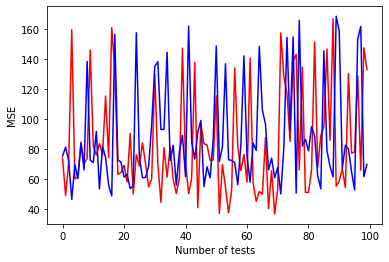

In [29]:
##5g
import matplotlib.pyplot as plt

plt.plot([i for i in range(0,100)], mse1_results, color = 'red')
plt.plot([i for i in range(0,100)], mse2_results, color = 'blue')
plt.ylabel('MSE')
plt.xlabel('Number of tests')
plt.show()

In [30]:
#Based on the graph, we can see that model 1 in red had more MSE's closer to 0 than model 2. So model 1 had
#better performance on the test datasets.